## **Light GBM**

In [22]:
!pip install lightgbm

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data =load_breast_cancer()
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [3]:
import pandas as pd
X = cancer_data.data
y = cancer_data.target
cancer_data = pd.DataFrame(X,columns = cancer_data.feature_names)

cancer_data['TARGET'] = y
cancer_data.head(10)

mean radius  mean texture  ...  worst fractal dimension  TARGET
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0
5        12.45         15.70  ...                  0.12440       0
6        18.25         19.98  ...                  0.08368       0
7        13.71         20.83  ...                  0.11510       0
8        13.00         21.82  ...                  0.10720       0
9        12.46         24.04  ...                  0.20750       0

[10 rows x 31 columns]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
import seaborn as sns

In [5]:
X = cancer_data.drop(['TARGET'],axis=1)
y = cancer_data[['TARGET']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train) #Instead of lgb.fit(X_train,y_train), we gonna use lgb.Dataset(X_train,y_train)

lgbm_params = {'learning_rate':0.05, 
               'boosting_type':'gbdt',    #Try dart for better accuracy #gbdt
               'objective':'binary',
               'metric':['auc', 'binary_logloss'],
               'num_leaves':100,
               'max_depth':10}

In [10]:
start=datetime.now()
clf = lgb.train(lgbm_params, d_train, 50)  #Instead of lgb.fit(X_train,y_train), we gonna use lgb.Dataset(X_train,y_train)
                                           #50 iterations. Increase iterations for small learning rates
stop=datetime.now()
execution_time_lgbm = stop-start
print("LGBM execution time is: ", execution_time_lgbm)
#With GPU - 0.107097
#With TPU - 0.133226

LGBM execution time is:  0:00:00.157441


In [11]:
#Prediction on test data
y_pred_lgbm=clf.predict(X_test)
y_pred_lgbm

array([0.95895895, 0.05739376, 0.04412006, 0.96847447, 0.96859819,
       0.06178702, 0.05308125, 0.21031829, 0.49895329, 0.9558821 ,
       0.94536256, 0.0581717 , 0.95191222, 0.59316482, 0.96191262,
       0.05222794, 0.97113436, 0.96129465, 0.96642449, 0.05279743,
       0.93362353, 0.963838  , 0.05047691, 0.96864641, 0.95506469,
       0.93989654, 0.97026911, 0.91140727, 0.9696398 , 0.04795957,
       0.95771066, 0.96997444, 0.90763096, 0.96418659, 0.96975881,
       0.95822819, 0.33215074, 0.91253555, 0.05134998, 0.82183024,
       0.96891319, 0.04371674, 0.9759898 , 0.96988888, 0.8869292 ,
       0.95216885, 0.95418302, 0.95496347, 0.9509726 , 0.95556642,
       0.05025671, 0.05020801, 0.87401394, 0.8957235 , 0.96887625,
       0.95689516, 0.97001995, 0.05474239, 0.1295101 , 0.9684012 ,
       0.96978834, 0.05146948, 0.05507067, 0.91408188, 0.97022123,
       0.91072506, 0.04869478, 0.0641776 , 0.96358194, 0.96322122,
       0.05541931, 0.04924006, 0.96354515, 0.05615028, 0.95634

In [12]:
#convert into binary values 0/1 for classification
for i in range(0, X_test.shape[0]):
    if y_pred_lgbm[i]>=.5:       # setting threshold to .5
       y_pred_lgbm[i]=1
    else:  
       y_pred_lgbm[i]=0

In [13]:
#Print accuracy
print ("Accuracy with LGBM = ", accuracy_score(y_pred_lgbm,y_test))

Accuracy with LGBM =  0.956140350877193


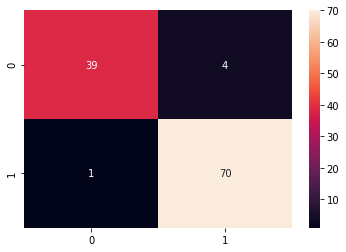

In [14]:
#Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)

In [20]:
print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm,y_test))

AUC score with LGBM is:  0.9604729729729731


## **XGBOOST**

In [21]:
!pip install xgboost

In [15]:
import xgboost as xgb 
dtrain=xgb.DMatrix(X_train,label=y_train)

parameters={'max_depth':10, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05,
            'ntree_limit':'num_round'}

In [16]:
start = datetime.now() 
xg=xgb.train(parameters, dtrain, 50) 
stop = datetime.now()

In [17]:
#Execution time of the model 
execution_time_xgb = stop-start 
print("XGBoost execution time is: ", execution_time_xgb)

#With GPU - 0.897203
#With TPU - 0.226132

XGBoost execution time is:  0:00:00.226132


In [18]:
#now predicting the model on the test set 
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xg.predict(dtest) 
y_pred_xgb

array([0.95560884, 0.04670651, 0.04670651, 0.9537023 , 0.95624447,
       0.04670651, 0.04670651, 0.1603016 , 0.36296606, 0.9305706 ,
       0.90305775, 0.05922021, 0.93202883, 0.35635746, 0.9545101 ,
       0.0576926 , 0.952365  , 0.9525279 , 0.95624447, 0.04670651,
       0.9241578 , 0.95624447, 0.04670651, 0.95624447, 0.94778883,
       0.90283585, 0.95560884, 0.90431106, 0.95624447, 0.04670651,
       0.9522422 , 0.95624447, 0.75554246, 0.95344365, 0.95624447,
       0.95624447, 0.21091998, 0.9526681 , 0.04670651, 0.8953967 ,
       0.95624447, 0.04670651, 0.9537023 , 0.95624447, 0.7994155 ,
       0.9486641 , 0.9512375 , 0.9073691 , 0.95560884, 0.95383966,
       0.04670651, 0.04670651, 0.9148721 , 0.87775636, 0.95624447,
       0.95624447, 0.95624447, 0.04670651, 0.13902105, 0.95624447,
       0.95624447, 0.04670651, 0.04670651, 0.8815996 , 0.95624447,
       0.93171215, 0.04670651, 0.0586894 , 0.95624447, 0.95560884,
       0.05679741, 0.04670651, 0.9545101 , 0.04670651, 0.94778

In [19]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0  

Accuracy with XGBoost=  0.956140350877193
AUC score with XGBoost is:  0.9553571428571429


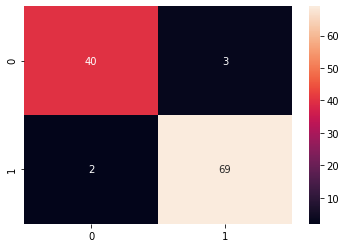

In [20]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with XGBoost= ", accuracy_score(y_pred_xgb, y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))

## **MODEL SUMMARY**

In [21]:
print("################################################")
print("LGBM execution time is: ", execution_time_lgbm)
print("XGBoost execution time is: ", execution_time_xgb)
print("################################################")
print ("Accuracy with LGBM = ", accuracy_score(y_pred_lgbm,y_test))
print ("Accuracy with XGBoost= ", accuracy_score(y_pred_xgb, y_test))
print("################################################")
print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm,y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))

################################################
LGBM execution time is:  0:00:00.157441
XGBoost execution time is:  0:00:00.226132
################################################
Accuracy with LGBM =  0.956140350877193
Accuracy with XGBoost=  0.956140350877193
################################################
AUC score with LGBM is:  0.9604729729729731
AUC score with XGBoost is:  0.9553571428571429
